In [1]:
import pandas as  pd
import numpy as np

In [2]:
df=pd.read_csv("/content/online_retail_listing (1).csv",encoding="unicode_escape",delimiter=";")

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
283862,516960,82494L,WOODEN FRAME ANTIQUE WHITE,6,26.07.2010 08:39,"2,95",12949.0,United Kingdom
283863,516960,82482,WOODEN PICTURE FRAME WHITE FINISH,6,26.07.2010 08:39,"2,55",12949.0,United Kingdom
283864,516960,82483,WOOD 2 DRAWER CABINET WHITE FINISH,4,26.07.2010 08:39,"5,95",12949.0,United Kingdom
283865,516960,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,26.07.2010 08:39,"7,95",12949.0,United Kingdom


In [4]:
df.isna().sum()

Invoice            0
StockCode          0
Description     2053
Quantity           0
InvoiceDate        0
Price              1
Customer ID    61055
Country            1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price           object
Customer ID    float64
Country         object
dtype: object

In [7]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [8]:
df['Price']=pd.to_numeric(df['Price'])

ValueError: Unable to parse string "6,95" at position 0

In [9]:
df['Price']=df['Price'].replace(",","",regex=True)

In [10]:
df['Price']=pd.to_numeric(df['Price'])

In [12]:
df_Recency=df.groupby(by="Customer ID",as_index=False)["InvoiceDate"].max()

In [13]:
df_Recency

,Customer ID,InvoiceDate
0,12346.0,2010-06-30 11:22:00
1,12349.0,2010-05-18 09:57:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-07-06 12:28:00
4,12359.0,2010-12-04 08:40:00
...,...,...
3191,18281.0,2010-11-05 10:49:00
3192,18283.0,2010-03-28 13:21:00
3193,18285.0,2010-02-17 10:24:00
3194,18286.0,2010-06-24 17:51:00


In [14]:
Recent_data=df_Recency["InvoiceDate"].max()

In [15]:
Recent_data

Timestamp('2010-12-07 16:43:00')

In [16]:
df_Recency['Recency']=df_Recency['InvoiceDate'].apply(lambda x:(Recent_data-x).days)

In [17]:
df_Recency

,Customer ID,InvoiceDate,Recency
0,12346.0,2010-06-30 11:22:00,160
1,12349.0,2010-05-18 09:57:00,203
2,12355.0,2010-05-21 11:59:00,200
3,12358.0,2010-07-06 12:28:00,154
4,12359.0,2010-12-04 08:40:00,3
...,...,...,...
3191,18281.0,2010-11-05 10:49:00,32
3192,18283.0,2010-03-28 13:21:00,254
3193,18285.0,2010-02-17 10:24:00,293
3194,18286.0,2010-06-24 17:51:00,165


In [18]:
df_frequency=df.drop_duplicates().groupby(by="Customer ID",as_index=False)["InvoiceDate"].count()
df_frequency.columns=["Customer ID","Frequency"]

In [19]:
df_frequency

,Customer ID,Frequency
0,12346.0,43
1,12349.0,52
2,12355.0,22
3,12358.0,35
4,12359.0,90
...,...,...
3191,18281.0,10
3192,18283.0,119
3193,18285.0,12
3194,18286.0,20


In [20]:
df["Total_price"]=df["Price"]*df["Quantity"]

In [21]:
df["Total_price"]

0         8340
1         8100
2         8100
3         1008
4         3000
          ... 
283861    1090
283862    1770
283863    1530
283864    2380
283865    3180
Name: Total_price, Length: 222812, dtype: int64

In [22]:
df_Monitory=df.groupby(by="Customer ID",as_index=False)["Total_price"].sum()

In [23]:
df_Monitory

,Customer ID,Total_price
0,12346.0,-14927
1,12349.0,102180
2,12355.0,48821
3,12358.0,167696
4,12359.0,176215
...,...,...
3191,18281.0,12032
3192,18283.0,32976
3193,18285.0,34690
3194,18286.0,30545


In [24]:
RFM_df=df_Recency.merge(df_frequency,on="Customer ID")
RFM_df=RFM_df.merge(df_Monitory,on="Customer ID")
RFM_df.columns=["Customer ID","Last_date","Recency","Frequency","Monitory"]

In [25]:
RFM_df

,Customer ID,Last_date,Recency,Frequency,Monitory
0,12346.0,2010-06-30 11:22:00,160,43,-14927
1,12349.0,2010-05-18 09:57:00,203,52,102180
2,12355.0,2010-05-21 11:59:00,200,22,48821
3,12358.0,2010-07-06 12:28:00,154,35,167696
4,12359.0,2010-12-04 08:40:00,3,90,176215
...,...,...,...,...,...
3191,18281.0,2010-11-05 10:49:00,32,10,12032
3192,18283.0,2010-03-28 13:21:00,254,119,32976
3193,18285.0,2010-02-17 10:24:00,293,12,34690
3194,18286.0,2010-06-24 17:51:00,165,20,30545


In [26]:
RFM_df["R_rank"]=RFM_df["Recency"].rank(ascending=False)

In [27]:
RFM_df["R_rank"]

0       1671.5
1       1096.5
2       1147.0
3       1807.0
4       3067.0
         ...  
3191    2842.5
3192     673.0
3193     424.5
3194    1577.5
3195    1081.5
Name: R_rank, Length: 3196, dtype: float64

In [28]:
RFM_df["R_Frequency"]=RFM_df["Frequency"].rank(ascending=True)

In [29]:
RFM_df["R_Monitory"]=RFM_df["Monitory"].rank(ascending=True)

In [30]:
RFM_df

,Customer ID,Last_date,Recency,Frequency,Monitory,R_rank,R_Frequency,R_Monitory
0,12346.0,2010-06-30 11:22:00,160,43,-14927,1671.5,1862.0,31.0
1,12349.0,2010-05-18 09:57:00,203,52,102180,1096.5,2063.5,2303.0
2,12355.0,2010-05-21 11:59:00,200,22,48821,1147.0,1177.5,1611.0
3,12358.0,2010-07-06 12:28:00,154,35,167696,1807.0,1642.0,2688.0
4,12359.0,2010-12-04 08:40:00,3,90,176215,3067.0,2527.0,2719.0
...,...,...,...,...,...,...,...,...
3191,18281.0,2010-11-05 10:49:00,32,10,12032,2842.5,549.0,376.0
3192,18283.0,2010-03-28 13:21:00,254,119,32976,673.0,2736.0,1232.5
3193,18285.0,2010-02-17 10:24:00,293,12,34690,424.5,652.5,1297.0
3194,18286.0,2010-06-24 17:51:00,165,20,30545,1577.5,1071.0,1148.0


In [32]:
RFM_df['R_rank_Normal']=(RFM_df["R_rank"]/RFM_df["R_rank"].max())*100

In [33]:
RFM_df['R_Frequency_Normal']=(RFM_df["R_Frequency"]/RFM_df["R_Frequency"].max())*100

In [34]:
RFM_df['R_Monitory_Normal']=(RFM_df["R_Monitory"]/RFM_df["R_Monitory"].max())*100

In [35]:
RFM_df

,Customer ID,Last_date,Recency,Frequency,Monitory,R_rank,R_Frequency,R_Monitory,R_rank_Normal,R_Frequency_Normal,R_Monitory_Normal
0,12346.0,2010-06-30 11:22:00,160,43,-14927,1671.5,1862.0,31.0,52.629093,58.260325,0.969962
1,12349.0,2010-05-18 09:57:00,203,52,102180,1096.5,2063.5,2303.0,34.524559,64.565081,72.058824
2,12355.0,2010-05-21 11:59:00,200,22,48821,1147.0,1177.5,1611.0,36.114610,36.842929,50.406758
3,12358.0,2010-07-06 12:28:00,154,35,167696,1807.0,1642.0,2688.0,56.895466,51.376721,84.105131
4,12359.0,2010-12-04 08:40:00,3,90,176215,3067.0,2527.0,2719.0,96.568010,79.067584,85.075094
...,...,...,...,...,...,...,...,...,...,...,...
3191,18281.0,2010-11-05 10:49:00,32,10,12032,2842.5,549.0,376.0,89.499370,17.177722,11.764706
3192,18283.0,2010-03-28 13:21:00,254,119,32976,673.0,2736.0,1232.5,21.190176,85.607009,38.563830
3193,18285.0,2010-02-17 10:24:00,293,12,34690,424.5,652.5,1297.0,13.365869,20.416145,40.581977
3194,18286.0,2010-06-24 17:51:00,165,20,30545,1577.5,1071.0,1148.0,49.669395,33.510638,35.919900


In [37]:
RFM_df["RFM_Score"]=0.15*RFM_df['R_rank_Normal']+0.28*RFM_df['R_Frequency_Normal']+0.57*RFM_df['R_Monitory_Normal']
RFM_df['RFM_Score'] *=0.05
RFM_df=RFM_df.round(2)
RFM_df

,Customer ID,Last_date,Recency,Frequency,Monitory,R_rank,R_Frequency,R_Monitory,R_rank_Normal,R_Frequency_Normal,R_Monitory_Normal,RFM_Score
0,12346.0,2010-06-30 11:22:00,160,43,-14927,1671.5,1862.0,31.0,52.63,58.26,0.97,1.24
1,12349.0,2010-05-18 09:57:00,203,52,102180,1096.5,2063.5,2303.0,34.52,64.57,72.06,3.22
2,12355.0,2010-05-21 11:59:00,200,22,48821,1147.0,1177.5,1611.0,36.11,36.84,50.41,2.22
3,12358.0,2010-07-06 12:28:00,154,35,167696,1807.0,1642.0,2688.0,56.90,51.38,84.11,3.54
4,12359.0,2010-12-04 08:40:00,3,90,176215,3067.0,2527.0,2719.0,96.57,79.07,85.08,4.26
...,...,...,...,...,...,...,...,...,...,...,...,...
3191,18281.0,2010-11-05 10:49:00,32,10,12032,2842.5,549.0,376.0,89.50,17.18,11.76,1.25
3192,18283.0,2010-03-28 13:21:00,254,119,32976,673.0,2736.0,1232.5,21.19,85.61,38.56,2.46
3193,18285.0,2010-02-17 10:24:00,293,12,34690,424.5,652.5,1297.0,13.37,20.42,40.58,1.54
3194,18286.0,2010-06-24 17:51:00,165,20,30545,1577.5,1071.0,1148.0,49.67,33.51,35.92,1.87


In [38]:
RFM_df['Customer Segment']=np.where(RFM_df['RFM_Score'] > 4.5,"Top Customer",
                                    (np.where(RFM_df['RFM_Score']>4,"High value Customer",
                                    (np.where(RFM_df['RFM_Score'] > 3, "Mid Value Customer",
                                    np.where(RFM_df['RFM_Score'] > 1.6 , " Low value Customer", "Lost Customer"))))))

In [39]:
RFM_df

,Customer ID,Last_date,Recency,Frequency,Monitory,R_rank,R_Frequency,R_Monitory,R_rank_Normal,R_Frequency_Normal,R_Monitory_Normal,RFM_Score,Customer Segment
0,12346.0,2010-06-30 11:22:00,160,43,-14927,1671.5,1862.0,31.0,52.63,58.26,0.97,1.24,Lost Customer
1,12349.0,2010-05-18 09:57:00,203,52,102180,1096.5,2063.5,2303.0,34.52,64.57,72.06,3.22,Mid Value Customer
2,12355.0,2010-05-21 11:59:00,200,22,48821,1147.0,1177.5,1611.0,36.11,36.84,50.41,2.22,Low value Customer
3,12358.0,2010-07-06 12:28:00,154,35,167696,1807.0,1642.0,2688.0,56.90,51.38,84.11,3.54,Mid Value Customer
4,12359.0,2010-12-04 08:40:00,3,90,176215,3067.0,2527.0,2719.0,96.57,79.07,85.08,4.26,High value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,18281.0,2010-11-05 10:49:00,32,10,12032,2842.5,549.0,376.0,89.50,17.18,11.76,1.25,Lost Customer
3192,18283.0,2010-03-28 13:21:00,254,119,32976,673.0,2736.0,1232.5,21.19,85.61,38.56,2.46,Low value Customer
3193,18285.0,2010-02-17 10:24:00,293,12,34690,424.5,652.5,1297.0,13.37,20.42,40.58,1.54,Lost Customer
3194,18286.0,2010-06-24 17:51:00,165,20,30545,1577.5,1071.0,1148.0,49.67,33.51,35.92,1.87,Low value Customer


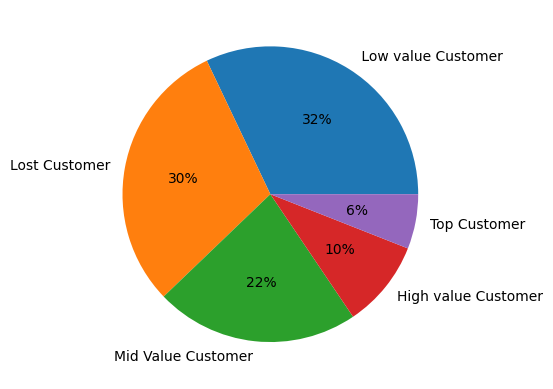

In [40]:
from matplotlib import pyplot as plt
plt.pie(RFM_df['Customer Segment'].value_counts(),
       labels=RFM_df['Customer Segment'].value_counts().index,
       autopct='%.0f%%')
plt.show()